In [20]:
%load_ext autoreload
%autoreload 2

import ergast_loader
import pirelli_loader
import plot

import matplotlib.pyplot as plt
import seaborn as sns
import data_tools
import style
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Driver colors and linestyle is only configured for 2020 so far.

In [5]:
# import refresh_ergast
# refresh_ergast.refresh()
ergast = ergast_loader.ErgastLoader('data//ergast_data')

## delta from target driver

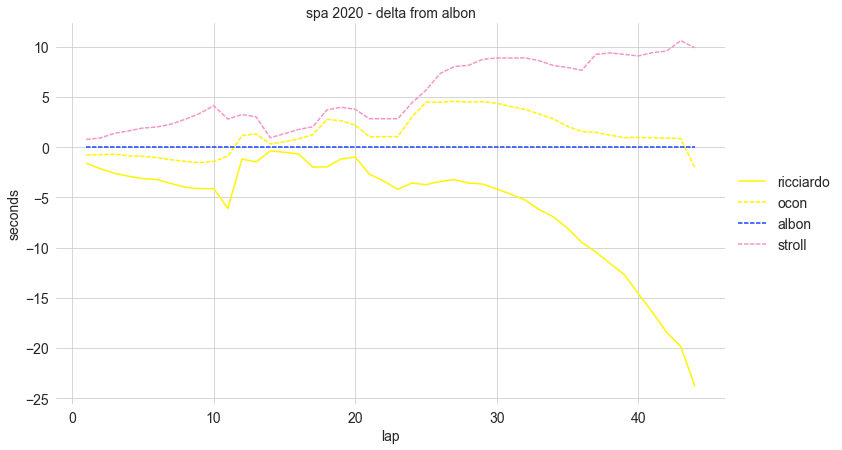

In [106]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 7), 
    tgt_driver='albon',
    driver_refs=['albon', 'ocon', 'stroll', 'ricciardo']
)

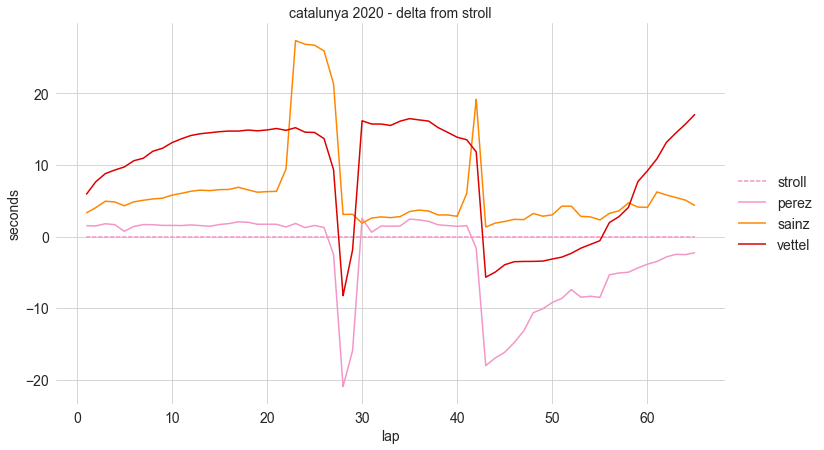

In [110]:
fig, ax = plot.delta_chart(
    ergast, 
    race='2020_spanish_grand_prix', 
    tgt_driver='stroll',
    driver_refs=['stroll', 'perez', 'sainz', 'vettel']
)

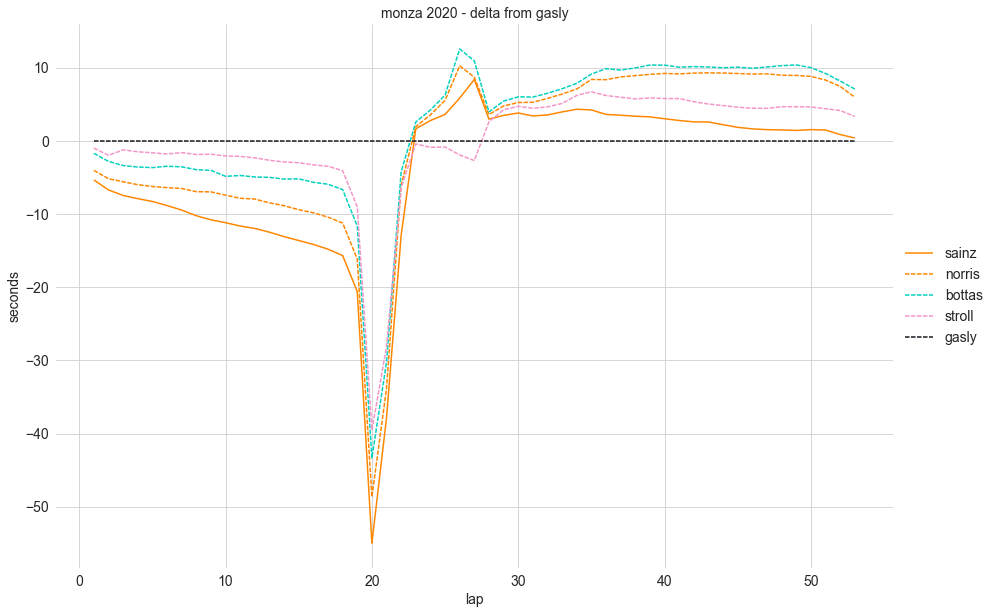

In [104]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 8), 
    tgt_driver='gasly',
    driver_refs=['stroll', 'sainz', 'gasly', 'norris', 'bottas'],
    figsize=(15,10)
)

fig.savefig('deleteme.png', dpi=300, bbox_inches='tight')

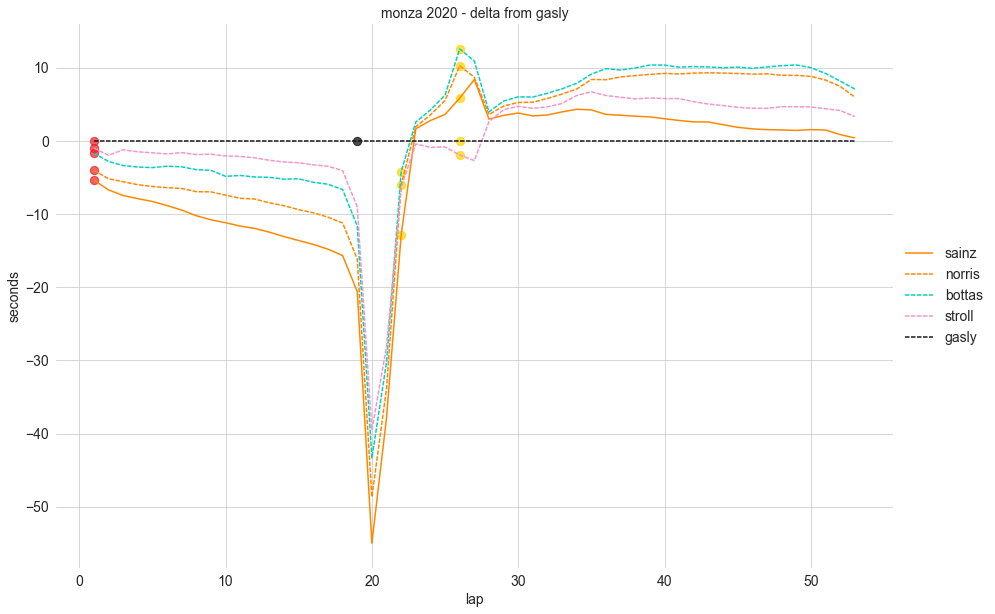

In [103]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 8), 
    tgt_driver='gasly',
    driver_refs=['stroll', 'sainz', 'gasly', 'norris', 'bottas'],
    figsize=(15,10),
    show_tyres=True
)

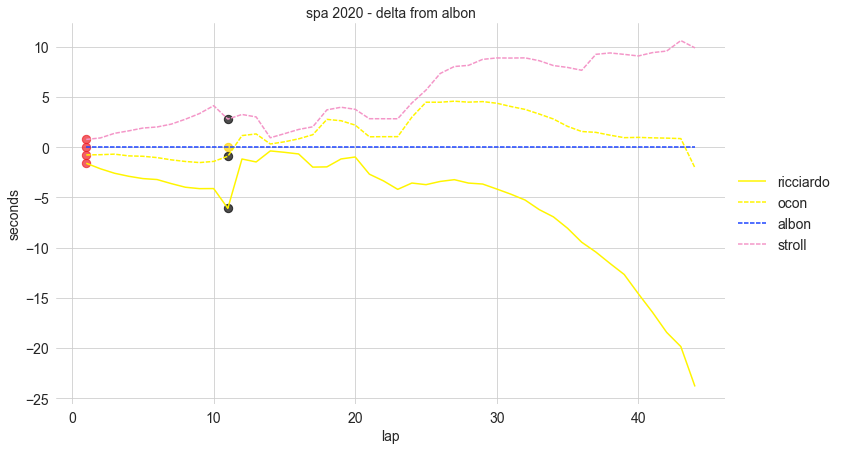

In [102]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 7), 
    tgt_driver='albon',
    driver_refs=['albon', 'ocon', 'stroll', 'ricciardo'],
    show_tyres=True
)